In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from data_collector import SmithsonianDataCollector
from ai_analyzer import SmithsonianAIAnalyzer
import os
from IPython.display import display, HTML


Retrieved 79789 items

Data successfully converted to DataFrame
Shape: (150, 11)


,id,title,type,url,date,topic,object_type,online_media_type,data_source,creators,thumbnail
0,ld1-1646149545906-1646150675627-2,Pop art portraits / Paul Moorhouse ; with an e...,edanmdm,https://siris-libraries.si.edu/ipac20/ipac.jsp...,[2000s],"['Pop art', 'Portraits']",['Books'],[],Smithsonian Libraries,"['Moorhouse, Paul', 'National Portrait Gallery...",
1,ld1-1646149545906-1646150283643-2,Drawing from life [electronic resource] : sele...,edanmdm,https://siris-libraries.si.edu/ipac20/ipac.jsp...,[2000s],"['Caricatures', 'Cartoons']","['Exhibitions (events)', 'Electronic informati...",[],Smithsonian Libraries,"['Boese, Kent C', 'Smithsonian Institution', '...",
2,ld1-1646149545906-1646150868952-1,Smithsonian American Art Museum/National Portr...,edanmdm,https://siris-libraries.si.edu/ipac20/ipac.jsp...,[2000s],"['Art, American', 'Library resources', 'Portra...",['Electronic information resources'],[],Smithsonian Libraries,['Smithsonian American Art Museum/National Por...,



Performing AI clustering analysis...

Cluster Analysis Results:

Cluster 0:
  Size: 16 items
  Top terms: portrait, man, woman, self, painting
  Sample items: portrait of man looking left, The art of portrait painting; portraits through the centuries as seen through the eyes of a practicing portrait painter [by] Gordon C. Aymar

Cluster 1:
  Size: 116 items
  Top terms: art, portraits, american, gallery, national
  Sample items: Pop art portraits / Paul Moorhouse ; with an essay by Dominic Sandbrook, Drawing from life [electronic resource] : selections of caricatures & cartoons from the American Art/Portrait Gallery library collection

Cluster 2:
  Size: 7 items
  Top terms: portraits, british, arts, huizhou, identity
  Sample items: The image of the poet : British poets and their portraits / David Piper, Modern British portraits : Arts Council of Great Britain 1960-61

Cluster 3:
  Size: 3 items
  Top terms: von, count, zsuzsa, figures, electronic
  Sample items: O Mensch! das Bildni

,cluster_id,topic_name,key_terms,item_count
0,1,Topic 1: art portraits american,"art, portraits, american, gallery, national",80
1,3,Topic 3: von count zsuzsa,"von, count, zsuzsa, figures, electronic",3
2,0,Topic 0: portrait man woman,"portrait, man, woman, self, painting",7
3,5,Topic 5: portraiture exhibition national,"portraiture, exhibition, national, gallery, po...",3
4,2,Topic 2: portraits british arts,"portraits, british, arts, huizhou, identity",6
5,4,Topic 4: painting figure colours,"painting, figure, colours, observations, setting",1



Finding related items for sample item (ID: ld1-1646149545906-1646150675627-2)...


,title,type,date
1,Drawing from life [electronic resource] : sele...,edanmdm,[2000s]
2,Smithsonian American Art Museum/National Portr...,edanmdm,[2000s]
3,Man in art; studies in religious and historica...,edanmdm,[1890s]



AI Analysis completed successfully!


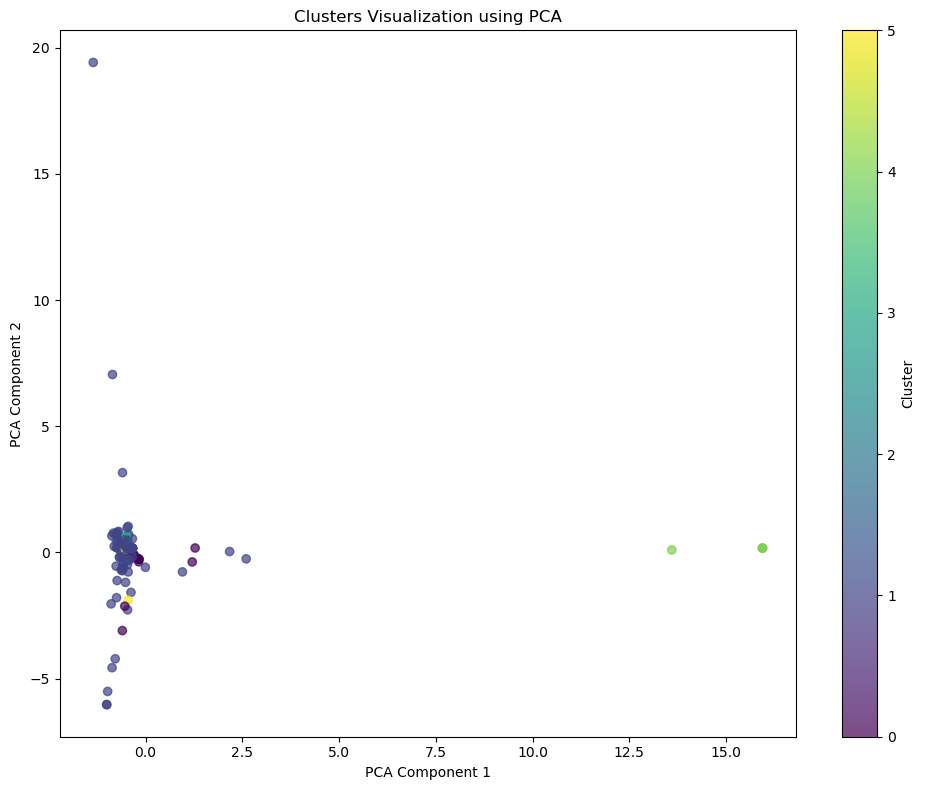

In [17]:
# Initialize the data collector
collector = SmithsonianDataCollector()

# 1. Collect data from the API - we'll try a different query this time
print("Collecting data from Smithsonian API...")
art_data = collector.search_collections("art AND portrait", rows=150)
print(f"Retrieved {art_data['response']['rowCount']} items\n")

# 2. Convert to DataFrame for analysis
df = collector.convert_to_dataframe(art_data)
print("Data successfully converted to DataFrame")
print(f"Shape: {df.shape}")
display(df.head(3))

# 3. Initialize the AI analyzer
analyzer = SmithsonianAIAnalyzer(df)

# 4. Perform clustering analysis
print("\nPerforming AI clustering analysis...")
cluster_analysis = analyzer.cluster_items(n_clusters=6, text_column='title')

# Display cluster information
print("\nCluster Analysis Results:")
for cluster_id, info in cluster_analysis.items():
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {info['size']} items")
    print(f"  Top terms: {', '.join(info['top_terms'])}")
    print(f"  Sample items: {', '.join(info['sample_items'][:2])}")

# 5. Visualize the clusters
print("\nVisualizing clusters...")
plt_clusters = analyzer.visualize_clusters(dim_reduction='pca')
os.makedirs('ai_analysis', exist_ok=True)
plt_clusters.savefig('ai_analysis/clusters_visualization.png')

# 6. Analyze temporal patterns
print("\nAnalyzing temporal patterns...")
plt_temporal = analyzer.analyze_temporal_patterns()
if plt_temporal:
    plt_temporal.savefig('ai_analysis/temporal_patterns.png')

# 7. Get topic predictions
print("\nGenerating topic predictions...")
topic_predictions = analyzer.get_topic_predictions()
display(topic_predictions)

# 8. Find related items for a sample item
sample_item_id = df['id'].iloc[0]
print(f"\nFinding related items for sample item (ID: {sample_item_id})...")
related_items = analyzer.predict_related_items(sample_item_id, n_recommendations=3)
display(related_items[['title', 'type', 'date']])

print("\nAI Analysis completed successfully!")